With this script I create a hdf5 file cointaing all the HST fits files. This improve the efficiency of the loader (based on Shooby's script). In addition it print out also some randomly chosen images.

In [3]:
import os
import h5py
from astropy.io import fits
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


input_folder='/Users/dianas/Desktop/GAN/v1_2/HST_fits'
filenames = os.listdir(input_folder)
sample_size = len(filenames)

tfms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
train_shape = (sample_size, 1, 64, 64)
hdf5_file = h5py.File('Train_sample.hdf5', mode='w')
hdf5_file.create_dataset("train_img", train_shape, np.float32)
hdf5_file.create_dataset("train_labels", (sample_size,), np.float32)
hdf5_file["train_labels"][...] = np.zeros(sample_size)

#byteswap useful to convert the byte order of the numpy array 
#to the native byte order of the system
for i, filename in enumerate(filenames):
    data = fits.getdata(os.path.join(input_folder, filename)).byteswap().newbyteorder()
    hdf5_file["train_img"][i, ...] = tfms(data)

hdf5_file.close()

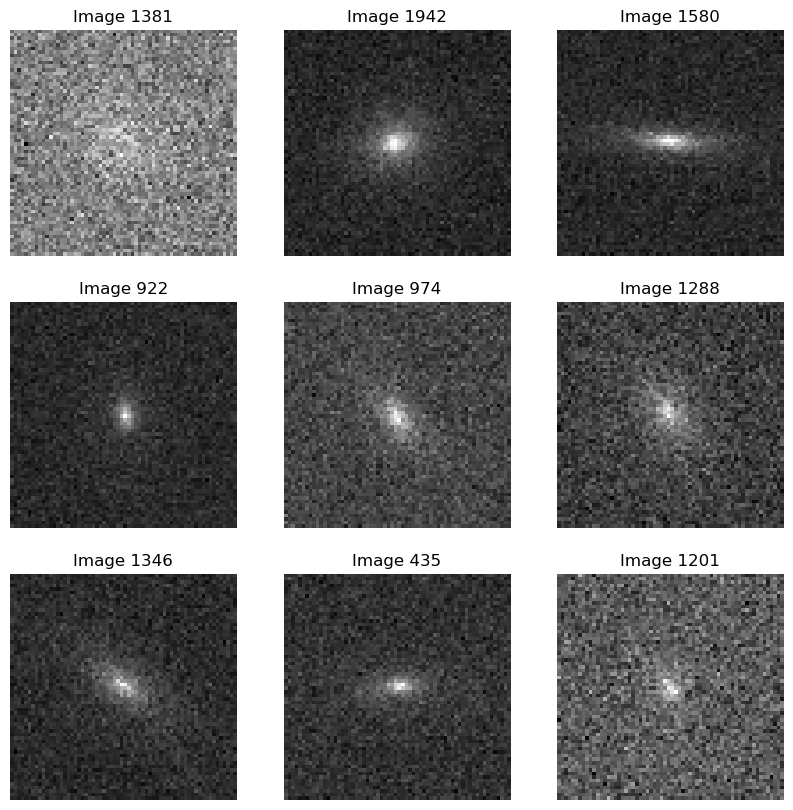

In [4]:
#Plot the files, choosing them randomly
import h5py
import matplotlib.pyplot as plt

#Open HDF5 file
hdf5_file = h5py.File('Train_sample.hdf5', 'r')

#Get the set of images
images = hdf5_file['train_img']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(images.shape[0])
    img_data = images[idx, 0]

    ax.imshow(img_data, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {idx}')

plt.show()